# Fractal Generator

Let us start with the Mandelbrot set. 

The Mandelbrot set is a set of all values $c$ for which the orbit of the critical point $z=0$ under the following iteration,

$$
z_{n+1} = z_n^2 + c
$$

remains bounded.

For example, say we pick up $c=1$. Then, we get the following series,

In [1]:
# start with z=0
z = 0
c = 1
for n in range(10):
	print(z)
	next_z = z**2 + c
	z = next_z
	


0
1
2
5
26
677
458330
210066388901
44127887745906175987802
1947270476915296449559703445493848930452791205


This is clearly unbounded, and so, 1 does not belong to the Mandelbrot set. On the other hand, if we choose $c=-1$,

In [2]:
z=0
c=-1
for n in range(10):
    print(z)
    next_z = z**2 + c
    z = next_z

0
-1
0
-1
0
-1
0
-1
0
-1


This is bounded, even if it does not converge.

So, here's a question : how do you manage to find all values of c?

Now, I'm not going to try and solve this myself. I'm just going to look up how this is normally done in Wikipedia and try to do as many as I can.

## Unoptimized naive escape time algorithm

You basically create a grid. Each pixel position, x and y, corresponds to your starting value of $c$.

You keep performing the iterations until it hits an "escape condition", then you bail out. Positions outside the Mandelbrot set will eventually converge, maybe quickly. Regions close to the boundary, it will take a while to converge. Regions inside the Mandelbrot set will never converge. So you also need to set some maximum depth : `MAX_DEPTH` for how many iterations you will perform before you give up and say it's inside the Mandelbrot set.

The escape conditions are multidunious, but a basic condition is that, if either the real or imaginary part of the complex number exceeds 2, you will bail out immediately.

A fast way to do the above is to calculate the Pythagoras theorem and say that the hypot is greater than 4, kick it out.

Color of the pixel represents how quickly that pixel took to get to the escape point. Paint it black if we hit the max depth before we hit the escape point.

Now, for the rendering. Let me just steal them.

```
for each pixel (Px, Py) on the screen do
    x0 := scaled x coordinate of pixel (scaled to lie in the Mandelbrot X scale (-2.00, 0.47))
    y0 := scaled y coordinate of pixel (scaled to lie in the Mandelbrot Y scale (-1.12, 1.12))
    x := 0.0
    y := 0.0
    iteration := 0
    max_iteration := 1000
    while (x*x + y*y ≤ 2*2 AND iteration < max_iteration) do
        xtemp := x*x - y*y + x0
        y := 2*x*y + y0
        x := xtemp
        iteration := iteration + 1
 
    color := palette[iteration]
    plot(Px, Py, color)
```



In [59]:
#python3
import numpy as np
import matplotlib.pyplot as plt
import time

In [57]:
class Pixel:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color

def rescale(number, width, min_val, max_val):
    return (max_val - min_val)*number/width + min_val

This works for when the number of horizontal and vertical pixels are the same. When it's not the same, for some reason, there's banding and interlocking bullshit. This is quite possibly because of our exit condition. It expects some rotational symmetry in our campus.

In [67]:
def unoptimized_escape_time_algorithm(x_width, y_width):
	xs = np.arange(0,x_width)
	ys = np.arange(0,y_width)

	screen = np.asarray([[Pixel(x, y, 0) for x in xs] for y in ys]).flatten()
	for pixel in screen:
		x0 = rescale(pixel.x, x_width, -2.00, 0.47)
		y0 = rescale(pixel.y, y_width, -1.12, 1.12)
		x = 0
		y = 0
		iteration = 0
		max_iter = 1000
		while ((x*x + y*y <= 2*2) and (iteration < max_iter)):
			xtemp = x*x - y*y + x0
			y = 2*x*y + y0
			x = xtemp
			iteration += 1
		pixel.color = iteration
	
	pixel_color = [pixel.color for pixel in screen]
	reshaped_screen = np.reshape(pixel_color, (x_width,y_width))

	plt.figure(figsize=(x_width//20, y_width//20))
	plt.title(f"{x_width}x{y_width}")
	plt.imshow(reshaped_screen, interpolation="none")
	plt.show()
  

In [68]:
def optimized_escape_time_alogrithm(x_width, y_width):
	xs = np.arange(0,x_width)
	ys = np.arange(0,y_width)

	screen = np.asarray([[Pixel(x, y, 0) for x in xs] for y in ys]).flatten()
	for pixel in screen:
		x0 = rescale(pixel.x, x_width, -2.00, 0.47)
		y0 = rescale(pixel.y, y_width, -1.12, 1.12)
		x = 0
		y = 0
		iteration = 0
		max_iter = 1000

		x2 = 0
		y2 = 0
		while ((x2 + y2 <= 4) and (iteration < max_iter)):
			y = 2 * x * y + y0
			x = x2 - y2 + x0
			x2 = x * x
			y2 = y * y
			iteration += 1
		pixel.color = iteration
	
	pixel_color = [pixel.color for pixel in screen]
	reshaped_screen = np.reshape(pixel_color, (x_width,y_width))

	plt.figure(figsize=(x_width//20, y_width//20))
	plt.title(f"{x_width}x{y_width}")
	plt.imshow(reshaped_screen, interpolation="none")
	plt.show()
  

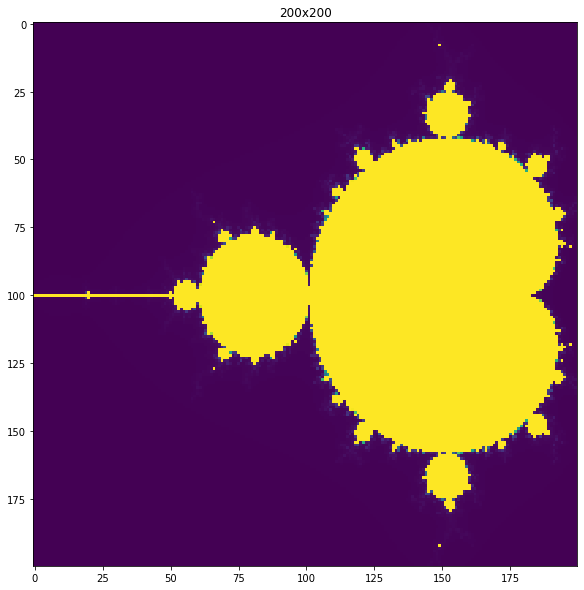

Unoptimized time : 5.045e+01 s


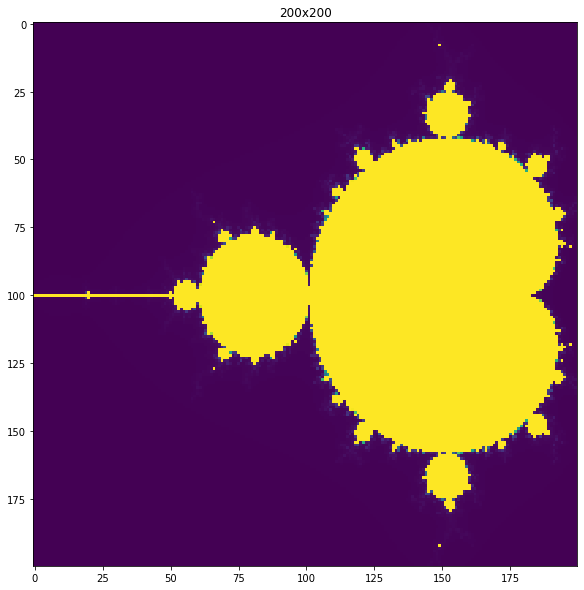

Optimized time : 4.675e+01 s


In [69]:
start = time.time_ns()

unoptimized_escape_time_algorithm(200,200)

end = time.time_ns()

print(f"Unoptimized time : {(end-start)/(1e9):1.3e} s")

start = time.time_ns()

optimized_escape_time_alogrithm(200,200)

end = time.time_ns()

print(f"Optimized time : {(end-start)/(1e9):1.3e} s")